In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C
import os

In [3]:
omp = 1
mpi_run = 'mpirun -np 8'

# Analysis of the band structure with pw

In [4]:
run_dir = 'Pw_bands'

We compute the band structure of Silicon and Gallium arsenide using the tools for QuantumESPRESSO

# Pw band structure of GaAs (without SO interaction)

The first step consists in a scf computation 

In [5]:
scf_prefix = 'gaas_scf'
bands_prefix = 'gaas_bands'

In [6]:
inp = I.PwInput(file='IO_files/gaas_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
#inp

In [7]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [8]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Run directory Pw_bands
Skip the computation for input gaas_scf


'Pw_bands/gaas_scf.save/data-file-schema.xml'

Now we perform the nscf computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [9]:
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

In [10]:
from mppi import Utilities as U

In [11]:
klist = U.build_kpath(L,G,X,K,G,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [0.0, 0.0, 1.0, 30],
 [0.0, 1.0, 1.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [12]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [13]:
results = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

The folder Pw_bands/gaas_bands.save already exsists. Source folder Pw_bands/gaas_scf.save not copied
Run directory Pw_bands
Skip the computation for input gaas_bands


Once that the computation is over we can create an instance of PwBands

In [14]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [15]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'K'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435])

It contains also a plot method that show the band structure

In [16]:
import matplotlib.pyplot as plt

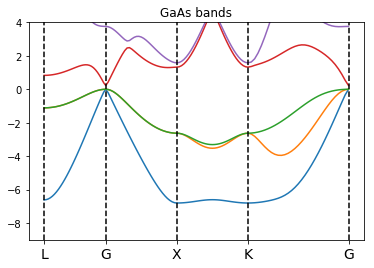

Indirect gap system
Energy gap : 0.2254301113194541 eV
Direct gap : 0.22543011132206656 eV


In [17]:
%matplotlib inline
plt.title('GaAs bands')
plt.ylim(-9,4)
bands.plot(plt,selection=[1,2,3,4,5],convert_eV=True)

# Band structure of Silicon

The first step consists in a scf computation 

In [18]:
scf_prefix = 'si_scf'
bands_prefix = 'si_bands'

In [19]:
inp = I.PwInput(file='IO_files/si_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
#inp

In [20]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [21]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Run directory Pw_bands
Skip the computation for input si_scf


'Pw_bands/si_scf.save/data-file-schema.xml'

Now we perform the nscf computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [22]:
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

In [23]:
from mppi import Utilities as U

In [24]:
klist = U.build_kpath(L,G,X,K,G,numstep=30)
#klist = U.build_kpath(L,G,Xu,B,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [0.0, 0.0, 1.0, 30],
 [0.0, 1.0, 1.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [25]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [26]:
results = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

The folder Pw_bands/si_bands.save already exsists. Source folder Pw_bands/si_scf.save not copied
Run directory Pw_bands
Skip the computation for input si_bands


Once that the computation is over we can create an instance of PwBands

In [27]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [28]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'K'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435])

It contains also a plot method that show the band structure

In [29]:
import matplotlib.pyplot as plt

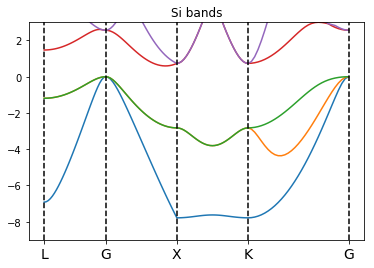

Indirect gap system
Energy gap : 0.5955556200825423 eV
Direct gap : 2.5651732373482257 eV


In [30]:
%matplotlib inline
plt.title('Si bands')
plt.ylim(-9,3)
bands.plot(plt,selection=[1,2,3,4,5],convert_eV=True)